<a href="https://colab.research.google.com/github/venkateshblks/simple_linear_regression/blob/main/Delivery_time_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
dt=pd.read_csv('delivery_time.csv')
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [2]:

dt.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [3]:
dt.shape

(21, 2)

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
dt.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
dt[dt.duplicated()]

,Delivery Time,Sorting Time


{'whiskers': [<matplotlib.lines.Line2D at 0x7c885a103100>,
 'caps': [<matplotlib.lines.Line2D at 0x7c885a103640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c885a102e00>],
 'medians': [<matplotlib.lines.Line2D at 0x7c885a103b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c885a103e20>],
 'means': []}

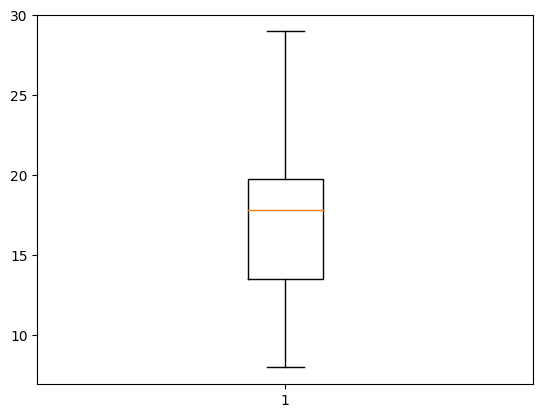

In [7]:
plt.boxplot(dt['Delivery Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7c88580216f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8858021c30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8858021450>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8858022170>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8858022410>],
 'means': []}

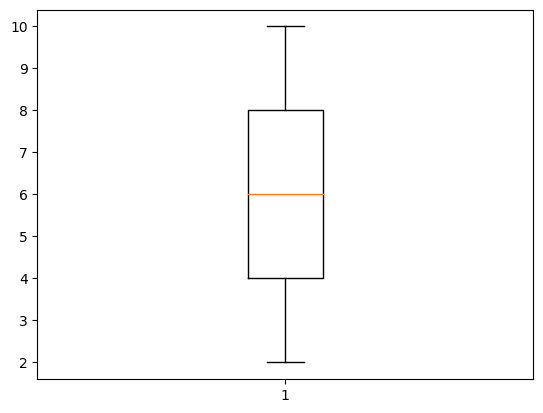

In [8]:
plt.boxplot(dt['Sorting Time'])

In [9]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


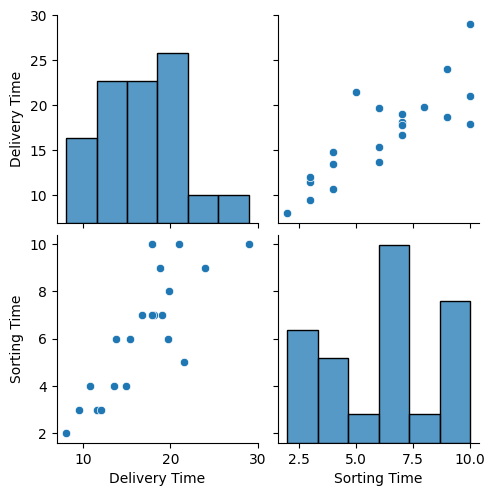

In [10]:
sns.pairplot(dt)

In [11]:
dt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Delivery Time', ylabel='Density'>

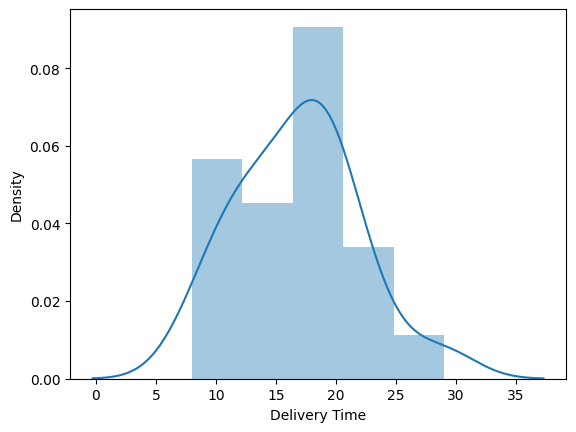

In [12]:
sns.distplot(dt['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

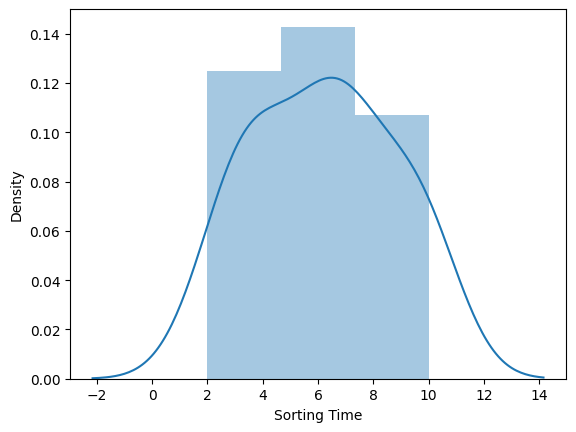

In [13]:
sns.distplot(dt['Sorting Time'])

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

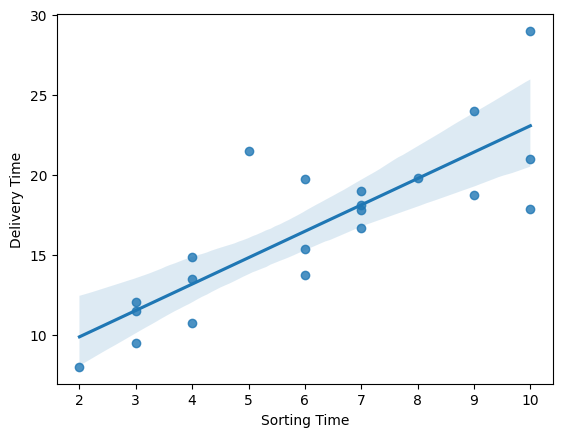

In [14]:
sns.regplot(y=dt['Delivery Time'],x=dt['Sorting Time'])

##Model1

In [15]:
dt=dt.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)
dt.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [16]:
import statsmodels.formula.api as smf
model=smf.ols('Delivery_Time~Sorting_Time',data=dt).fit()

In [17]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [18]:
print("tvalues:\n",model.tvalues,"\n\npvalues:\n",model.pvalues)

tvalues:
 Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 

pvalues:
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [19]:
print(model.rsquared,'\n',model.rsquared_adj)

0.6822714748417231 
 0.6655489208860244


In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        17:37:02   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pred=model.fittedvalues
# model.predict(salary['YearsExperience'])
dt['Y_hat']=pred
dt.head()

,Delivery_Time,Sorting_Time,Y_hat
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933


In [22]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error
mean_absolute_percentage_error(dt['Delivery_Time'],pred)

0.12379726239852056

In [23]:
mse=mean_squared_error(dt['Delivery_Time'],pred)
mse

7.793311548584062

In [24]:
RMSE=np.sqrt(mse)
RMSE

2.7916503270617654

In [25]:
mean_absolute_error(dt['Delivery_Time'],pred)

2.085740955188266

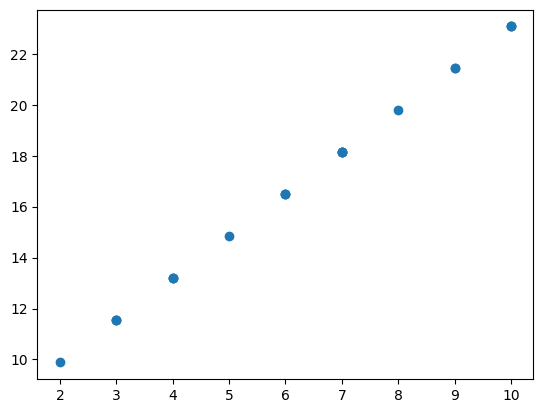

In [26]:
plt.scatter(dt['Sorting_Time'],pred)

In [27]:
dt.head()

,Delivery_Time,Sorting_Time,Y_hat
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933


In [28]:
model.fittedvalues.head()

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
dtype: float64

In [29]:
model.resid.head()  #fitted+resid=actual

0   -2.072933
1    0.321186
2    3.273147
3    2.576087
4    5.927067
dtype: float64

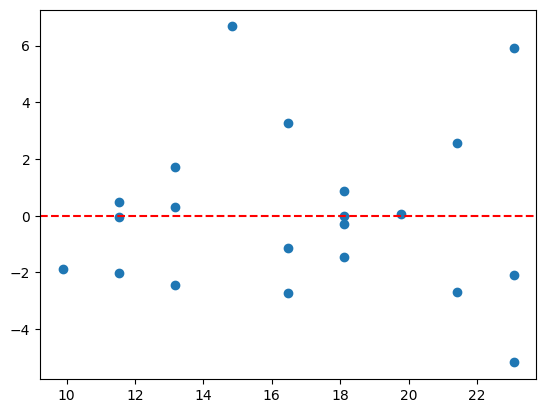

In [30]:
plt.scatter(pred, model.resid)
plt.axhline(y=0, color='r', linestyle='--')

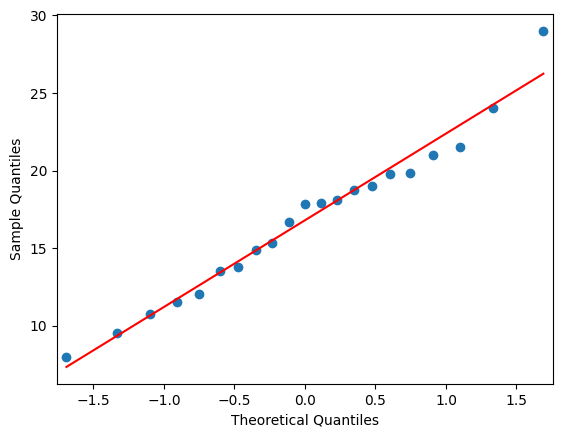

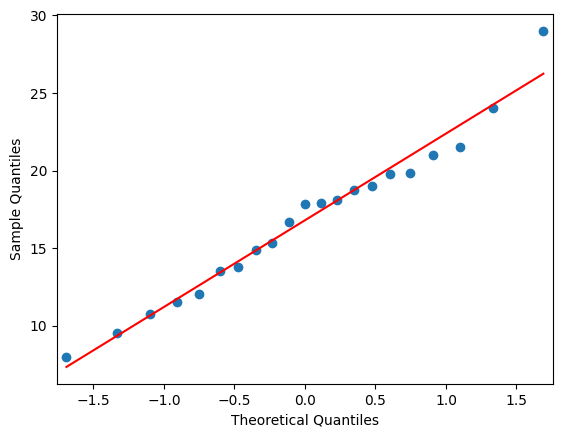

In [31]:
sm.qqplot(dt['Delivery_Time'], line = 'r')

#Model2

In [32]:
model2=smf.ols('Delivery_Time~np.sqrt(Sorting_Time)',dt).fit()

In [33]:
p=model2.fittedvalues
mean_absolute_error(dt['Delivery_Time'],p)

2.047327080280361

In [34]:
mse=mean_squared_error(dt['Delivery_Time'],p)
np.sqrt(mse)

2.731543210091211

In [35]:
p=model2.fittedvalues
p

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [36]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           2.61e-06
Time:                        17:37:03   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sorting_Time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        17:37:03   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# model3

In [38]:
model3=smf.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)',dt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Thu, 29 Feb 2024   Prob (F-statistic):           8.48e-07
Time:                            17:37:03   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **A higher R-squared value indicates a better fit of the model to the data**
#### **A higher adjusted R-squared is desirable.**
#### **models with lower AIC values are preferred**
#### **models with lower BIC values are preferred**
##  ***So Model3 is better than Model1 and Model2***

In [39]:
newdata=pd.Series([2,4,6])
data=pd.DataFrame(newdata,columns=['Sorting_Time'])
data

,Sorting_Time
0,2
1,4
2,6


In [40]:
data['predicted']=model3.predict(data)**2  #Model3
data.head()

,Sorting_Time,predicted
0,2,9.185915
1,4,13.089290
2,6,16.551868


In [41]:
dt.head()  #model1

,Delivery_Time,Sorting_Time,Y_hat
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
